# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
import seaborn as sb

In [23]:
# кол-во всего контрактов и кол-во задолженностей по возврату кредитов в завивисмоти от кол-ва детей
pivot_children = data.pivot_table(index = 'children', values = 'debt', aggfunc =['count','sum','mean']).reset_index()
pivot_children.columns = ['children','number_of_contracts','number_of_debt','debt_share,%']

#Показатель debt_share,% показывает долю кол-ва задолжностей среди всех контрактов в рамках каждой категории
pivot_children['debt_share,%'] = round(pivot_children['debt_share,%']*100,3)

print(display(pivot_children))

,children,number_of_contracts,number_of_debt,"debt_share,%"
0,0,14091,1063,7.544
1,1,4808,444,9.235
2,2,2052,194,9.454
3,3,330,27,8.182
4,4,41,4,9.756
5,5,9,0,0.000


None


<AxesSubplot:xlabel='children'>

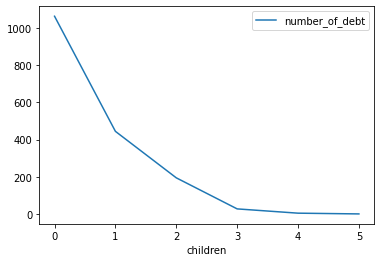

In [24]:
#Рисунок 1. Количество задолжностей в зависимости от количества детей в семье
child_debt = data.groupby('children').agg({'debt':['sum']})
child_debt.columns = ['number_of_debt']
child_debt.plot()

<AxesSubplot:xlabel='children', ylabel='debt_share,%'>

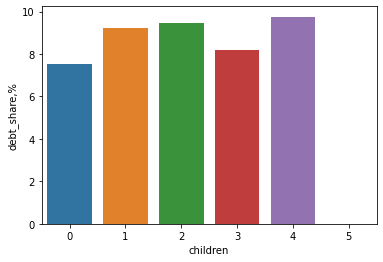

In [25]:
#Рисунок 2. Доля задолжностей среди всех контрактов в рамках каждой категории в зависимости от количества детей в семье
sb.barplot(x= pivot_children['children'],y=pivot_children['debt_share,%'])

In [26]:
max_debt_share = pivot_children[pivot_children['debt_share,%'] == pivot_children['debt_share,%'].max()]['children']
min_debt_share = pivot_children[pivot_children['debt_share,%'] == pivot_children['debt_share,%'].min()]['children']

print('Число детей в семьях с максимальной долей задолжностей:', max_debt_share) 
print('Число детей в семьях с минимальной долей задолжностей:', min_debt_share) 

Число детей в семьях с максимальной долей задолжностей: 4    4
Name: children, dtype: int64
Число детей в семьях с минимальной долей задолжностей: 5    5
Name: children, dtype: int64


**Вывод:** Из рисунка 1 заметна тенденция наличия бОльшего количества задолжностей у семей с наименьшим количеством детей. Однако количественные показатели могут трактовать неверные выводы, поэтому был расчитан относительный показатель debt_share. Максимальная доля задолжностей приходится на категорию семей с четыремя детьми, в то время как наименьшая указывает на пятерых детей. Доли задолжностей в категориях от 0 до 2 детей растет, однако спад у категории с 3 детьми и отсутсвие задолжностей у 5х немного отвергают гипотезу о наличии зависимости возврата кредита с кол-вом детей. 

Для подтверждения гипотезы зависимости между количеством детей и возвратом кредита в срок предлагается увеличить выборку, для более точной оценки результата. При поверхностной оценки можно предоположить о том, что чем больше детей, тем больше задолжностей.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [27]:
# кол-во всего контрактов и кол-во задолженностей по возврату кредитов в завивисмоти от семейного статуса
pivot_family = data.pivot_table (index = 'family_status', values = 'debt', aggfunc =['count','sum']).reset_index()
pivot_family.columns = ['status','number_of_contracts','number_of_debt']

#Показатель status_share,% показывает долю кол-ва задолжностей категории среди всех задолжностей
pivot_family['status_share,%'] = round(pivot_family['number_of_debt']/pivot_family['number_of_debt'].sum()*100,2)

#Показатель debt_share,% показывает долю кол-ва задолжностей среди всех контрактов в рамках каждой категории
pivot_family['debt_share,%'] = round(pivot_family['number_of_debt']/pivot_family['number_of_contracts']*100,2)

print(display(pivot_family))

,status,number_of_contracts,number_of_debt,"status_share,%","debt_share,%"
0,Не женат / не замужем,2796,273,15.76,9.76
1,в разводе,1189,84,4.85,7.06
2,вдовец / вдова,951,63,3.64,6.62
3,гражданский брак,4134,385,22.23,9.31
4,женат / замужем,12261,927,53.52,7.56


None


<AxesSubplot:xlabel='number_of_debt', ylabel='status'>

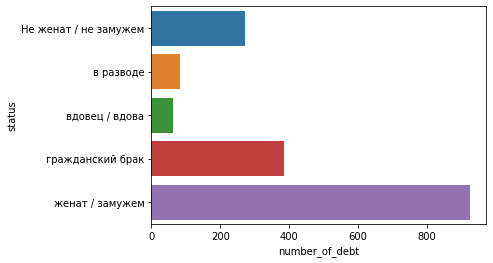

In [28]:
#Рисунок 3. Количество задолжностей в зависимости от семейного положения
sb.barplot(y= pivot_family['status'],x=pivot_family['number_of_debt'])

<AxesSubplot:xlabel='debt_share,%', ylabel='status'>

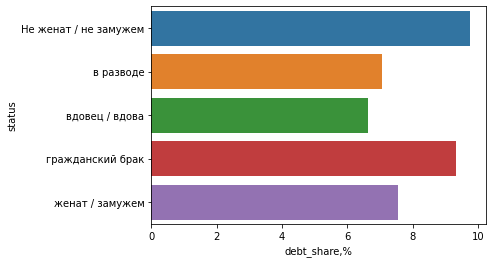

In [29]:
#Рисунок 4. Доля задолжностей среди всех контрактов в рамках каждой категории в зависимости от семейного положения
sb.barplot(y= pivot_family['status'],x=pivot_family['debt_share,%'])

In [30]:
max_debt_share = pivot_family[pivot_family['debt_share,%'] == pivot_family['debt_share,%'].max()]['status']
min_debt_share = pivot_family[pivot_family['debt_share,%'] == pivot_family['debt_share,%'].min()]['status']

print('Семейное положение с максимальной долей задолжностей:', max_debt_share) 
print('Семейное положение с минимальной долей задолжностей:', min_debt_share) 

Семейное положение с максимальной долей задолжностей: 0    Не женат / не замужем
Name: status, dtype: object
Семейное положение с минимальной долей задолжностей: 2    вдовец / вдова
Name: status, dtype: object


**Вывод:** Больше всего задолжностей, как и количества контрактов (53,5% от всех контрактов), у семейного положения "женат/замужем", однако доля задолжности среди контрактов в рамках категории занимает лишь 3-е место (7,56%). Наибольшая доля задолжности приходится на семейное положение "Не женат/не замужем" (9,76%). Второе место занял статус "гражданский брак". 

В целом данные два сегмента кредиторов могут иметь схожие особенности и характеристики, поэтому гипотеза о наличии зависимости между семейным положением и возвратом кредита в срок может быть верна: больше задолжностей приходится на людей в "незарегистрированных отношениях" и без отношений.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [31]:
# кол-во всего контрактов и кол-во задолженностей по возврату кредитов в завивисмоти от уровня дохода
pivot_income = data.pivot_table (index = 'total_income_category', values = 'debt', aggfunc =['count','sum']).reset_index()
pivot_income.columns = ['income_category','number_of_contracts','number_of_debt']

#Показатель income_share,% показывает долю кол-ва задолжностей категории среди всех задолжностей
pivot_income['income_share,%'] = round(pivot_income['number_of_debt']/pivot_income['number_of_debt'].sum()*100,2)

#Показатель debt_share,% показывает долю кол-ва задолжностей среди всех контрактов в рамках каждой категории
pivot_income['debt_share,%'] = round(pivot_income['number_of_debt']/pivot_income['number_of_contracts']*100,2)

print(display(pivot_income))

,income_category,number_of_contracts,number_of_debt,"income_share,%","debt_share,%"
0,A,25,2,0.12,8.00
1,B,5014,354,20.44,7.06
2,C,15921,1353,78.12,8.50
3,D,349,21,1.21,6.02
4,E,22,2,0.12,9.09


None


<AxesSubplot:xlabel='number_of_debt', ylabel='income_category'>

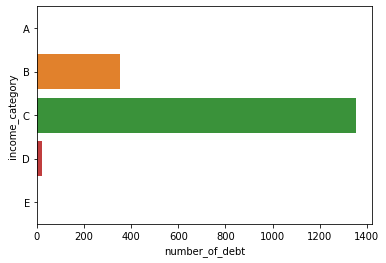

In [32]:
#Рисунок 5. Количество задолжностей в зависимости от уровня дохода
sb.barplot(y= pivot_income['income_category'],x=pivot_income['number_of_debt'])

<AxesSubplot:xlabel='debt_share,%', ylabel='income_category'>

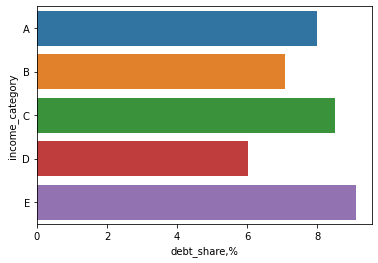

In [33]:
#Рисунок 6. Доля задолжностей среди всех контрактов в рамках каждой категории в зависимости от уровня дохода
sb.barplot(y= pivot_income['income_category'],x=pivot_income['debt_share,%'])

**Вывод:** В количественном выражении явный лидер по количеству задолжностей является категория дохода C (78%). В относительных показателях категория C занимает 2-е место (8,5%), лидером же по данному показателю является категория E (9%).
Можно говорить о наличии зависимости между уровнем дохода и возвратом кредита в срок, а именно больше всего задолжников имеет категорию C.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [34]:
# кол-во всего контрактов и кол-во задолженностей по возврату кредитов в завивисмоти от целей получения кредита
pivot_income = data.pivot_table (index = 'purpose_category', values = 'debt', aggfunc =['count','sum']).reset_index()
pivot_income.columns = ['purpose_category','number_of_contracts','number_of_debt']

#Показатель purpose_share,% показывает долю кол-ва задолжностей категории среди всех задолжностей
pivot_income['purpose_share,%'] = round(pivot_income['number_of_debt']/pivot_income['number_of_debt'].sum()*100,2)

#Показатель debt_share,% показывает долю кол-ва задолжностей среди всех контрактов в рамках каждой категории
pivot_income['debt_share,%'] = round(pivot_income['number_of_debt']/pivot_income['number_of_contracts']*100,2)

print(display(pivot_income))

,purpose_category,number_of_contracts,number_of_debt,"purpose_share,%","debt_share,%"
0,операции с автомобилем,4279,400,23.09,9.35
1,операции с недвижимостью,10751,780,45.03,7.26
2,получение образования,3988,369,21.30,9.25
3,проведение свадьбы,2313,183,10.57,7.91


None


<AxesSubplot:xlabel='number_of_debt', ylabel='purpose_category'>

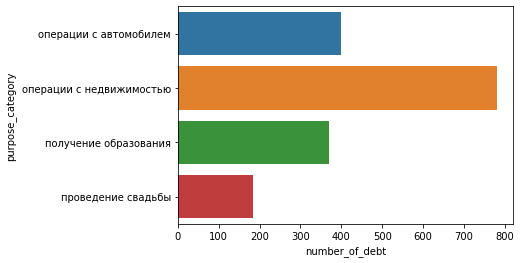

In [36]:
#Рисунок 7. Количество задолжностей в зависимости от цели кредита
sb.barplot(y= pivot_income['purpose_category'],x=pivot_income['number_of_debt'])

<AxesSubplot:xlabel='debt_share,%', ylabel='purpose_category'>

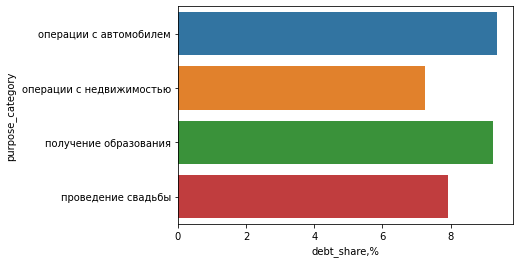

In [39]:
#Рисунок 8. Доля задолжностей среди всех контрактов в рамках каждой категории в зависимости от цели кредита
sb.barplot(y= pivot_income['purpose_category'],x=pivot_income['debt_share,%'])

**Вывод:** Расматривая рисунок 8 стоит отметить наличие небольшой разницы между значениями: операции с автомобилями и получение образования имеют наибольшие доли задолжностей (9,35% и 9,25% соответсвенно). Наименьшую долю задолжностей имеет категория "проведение свадьбы" (7,91%).

Из-за отсутствия сильных различий в значениях доли задолжностей не достатчно данных для подтверждения гипотезы о наличии зависимости возврата кредита в срок от целей кредита.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* пропуски присутствуют в days_employed (общий трудовой стаж в днях) и в total_income (ежемесячный доход).
Возможно это клиенты без наличия трудового стажа и неимеющие дохода. Возможно также кто-то не хотел заполнять данные о доходности (однако данные поля обычно обязательны к заполнению в анкете). существует и наличие человеческого фактора: ошибки при заполнении.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* В данных могут быть большие выбросы — очень высокие или наоборот маленькие значения. Среднее знчение в данном случае может сильно искажать действительность, медианное как раз больше сглаживает такие скачки в данных. 

### Шаг 4: общий вывод.

Анализ платёжеспособности клиентов банка выявил риски наличия задолжности у клиентов с 4-мя детьми, а также у клиентов зарабатывающих от 50001 до 200000 (категория C), у клиентов без официальных семейных отношений ("Не женат/не замужем","гражданский брак"). Явная зависимость между кредитоспособностью и цели кредита не выявлена.

Для анализа было представлено 21525 строк, в процессе обработки данных были убраны неявные и явные дубликаты, удалены строки с аномальными значениями (кол-во детей 20). В столбцах days_employed и total_income обнаружено и устранено 2174 пустот (заполнив пропуски в медианным значением по каждому типу занятости). Кроме того поменяли вещественный тип данных в столбце `total_income` на целочисленный. В блоке категоризация данных добавили к исходным данным категории дохоов total_income_category и целей purpose_category.

Анализ платёжеспособности клиентов банка выявил риски наличия задолжности у клиентов с 4-мя детьми, а также у клиентов зарабатывающих от 50001 до 200000 (категория C), у клиентов без официальных семейных отношений ("Не женат/не замужем","гражданский брак"). Явная зависимость между кредитоспособностью и цели кредита не выявлена.

В продолжении исследования можно рассмотреть влияние нескольких факторов одновременно на задолженности клиентов, а также провести кластерный анализ для выявления характерных категорий клиентов.